# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving zstat1.nii.gz to zstat1.nii.gz


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [3]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (64, 64, 21)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

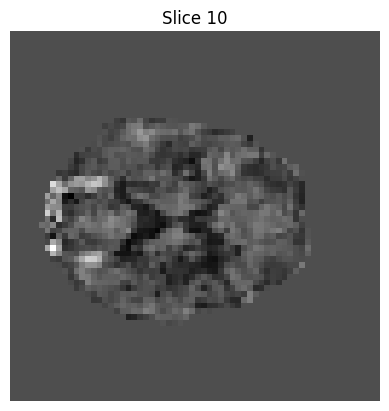

In [4]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [5]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

21

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

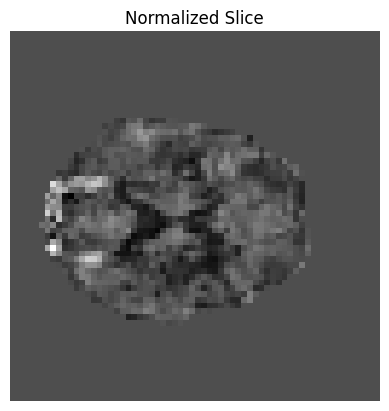

In [6]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

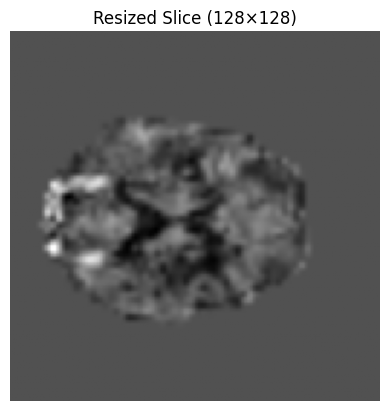

In [7]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


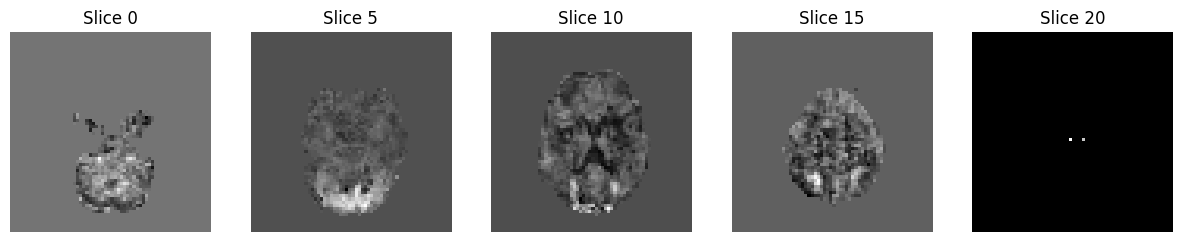

In [8]:
indices = np.linspace(0, mri.shape[2]-1, 5, dtype=int)

plt.figure(figsize=(15,3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(mri[:, :, idx].T, cmap='gray', origin='lower')
    plt.title(f'Slice {idx}')
    plt.axis('off')
plt.show()


In [9]:
def plot_slices(volume, indices):
    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i+1)
        plt.imshow(volume[:, :, idx].T, cmap='gray', origin='lower')
        plt.title(f'Slice {idx}')
        plt.axis('off')
    plt.show()

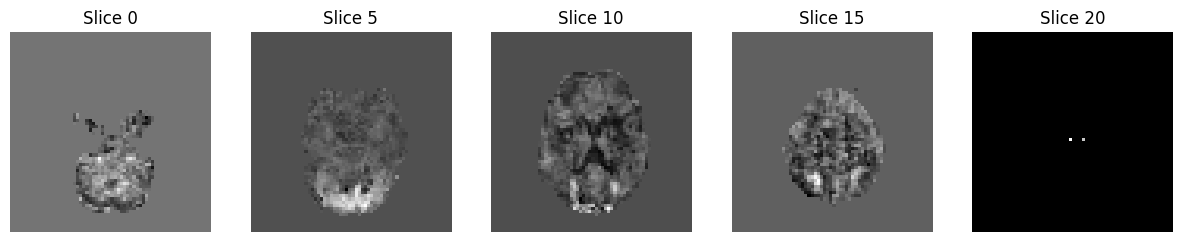

In [10]:
plot_slices(mri, [0, 5, 10, 15, 20])


In [11]:
def normalize_all_slices(volume):
    vmin = volume.min()
    vmax = volume.max()
    return (volume - vmin) / (vmax - vmin + 1e-8)

In [12]:
mri_norm = normalize_all_slices(mri)

(np.float64(-0.5), np.float64(63.5), np.float64(-0.5), np.float64(63.5))

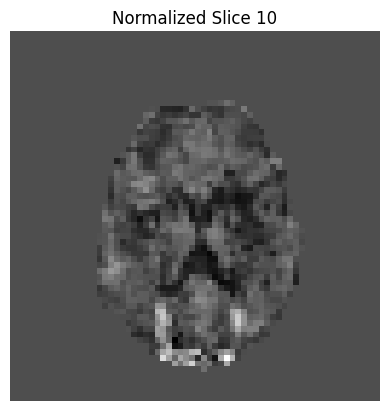

In [13]:
slice_index = mri_norm.shape[2] // 2

plt.imshow(mri_norm[:, :, slice_index].T, cmap='gray', origin='lower')
plt.title(f'Normalized Slice {slice_index}')
plt.axis('off')


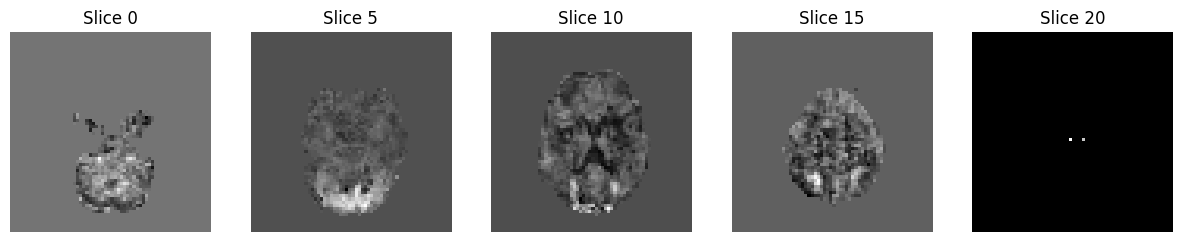

In [14]:
indices = [0, 5, 10, 15, 20]

plt.figure(figsize=(15,3))
for i, idx in enumerate(indices):
    plt.subplot(1, len(indices), i+1)
    plt.imshow(mri_norm[:, :, idx].T, cmap='gray', origin='lower')
    plt.title(f'Slice {idx}')
    plt.axis('off')

plt.show()


In [15]:
def plot_normalized_slices(volume, indices):
    norm_vol = normalize_all_slices(volume)
    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i+1)
        plt.imshow(norm_vol[:, :, idx].T, cmap='gray', origin='lower')
        plt.title(f'Slice {idx}')
        plt.axis('off')
    plt.show()


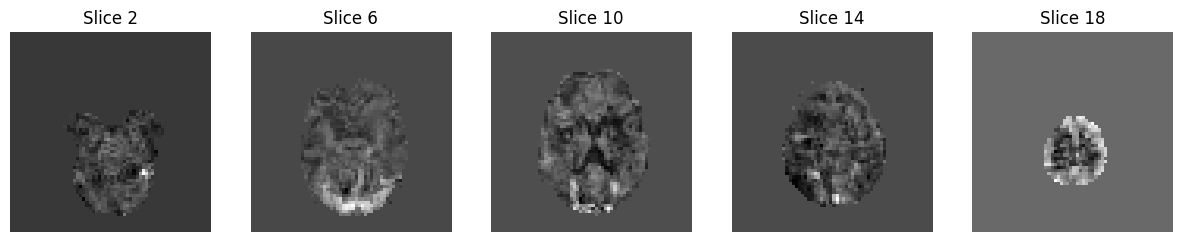

In [16]:
plot_normalized_slices(mri, [2, 6, 10, 14, 18])
